In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이미지를 그레이 스케일로 읽기
img = cv2.imread('./img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

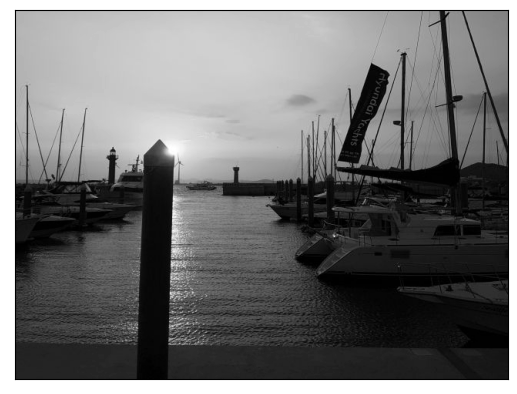

In [6]:
# 원본 이미지 확인
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
# 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # 히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) * 255     # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m, 0).astype('uint8')            # NaN을 다시 0으로 환원
img2 = cdf[img]                                         # 히스토그램을 픽셀로 매핑

In [9]:
# OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

In [10]:
# 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

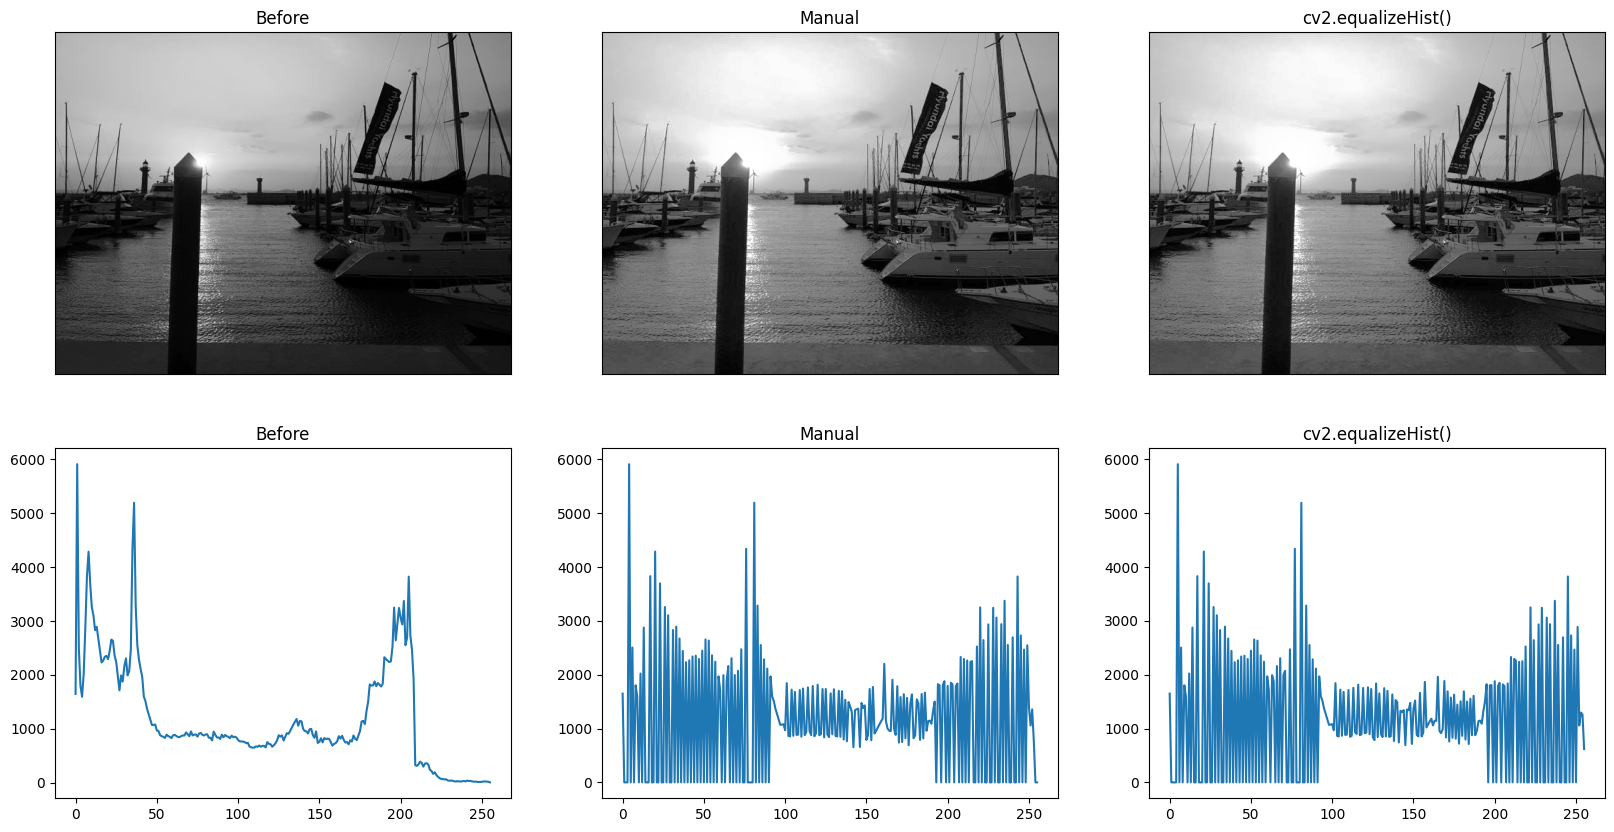

In [12]:
# 결과 출력
imgs = {'Before':img, 'Manual':img2, 'cv2.equalizeHist()':img3}
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}

fig = plt.figure(figsize=(20, 10))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')
    plt.xticks([])
    plt.yticks([])
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(2, 3, i+4)
    plt.title(k)
    plt.plot(v)
plt.show()